# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
bs = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
raw_rows = bs.find_all('tr', class_='data-row')
len(raw_rows)

1867

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
columns = [ [], [], [], [], [], [], [] ] # 7 empty lists, one for each columns

# Loop through the scraped data to create a list of rows
for raw_row in raw_rows:
    raw_row_data = raw_row.find_all('td')
    for c in range(len(columns)):
        columns[c].append( raw_row_data[c].text )

len(columns), len(columns[0])

(7, 1867)

In [7]:
# Column names
COL_ID = 'id'
COL_TDATE = 'terrestrial_date'
COL_SOL = 'sol'
COL_LS = 'ls'
COL_MMONTH = 'month'
COL_TEMP = 'min_temp'
COL_PRESSURE = 'pressure'

# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame( {
    COL_ID: columns[0],
    COL_TDATE: columns[1],
    COL_SOL: columns[2],
    COL_LS: columns[3],
    COL_MMONTH: columns[4],
    COL_TEMP: columns[5],
    COL_PRESSURE: columns[6] })
df.describe()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
count,1867,1867,1867,1867,1867,1867,1867
unique,1867,1867,1867,360,12,29,199
top,2,2012-08-16,10,96,4,-77.0,850.0
freq,1,1,1,8,194,138,25


In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df = df.astype({
    COL_TDATE: 'datetime64[ns]',
    COL_SOL: 'int32',
    COL_LS: 'int32',
    COL_MMONTH: 'int32',
    COL_TEMP: 'float64',
    COL_PRESSURE: 'float64'
    })

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
df[COL_MMONTH].max()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
# We could just get the number of rows, but this method guards against redundant data:
len(df[COL_SOL].unique())

1867

In [14]:
# 3. What is the average minimum temperature by month?
df.groupby(COL_MMONTH)[COL_TEMP].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: title={'center': 'Average Minimum Temperature by Month'}, xlabel='month', ylabel='Temperature in Celsius'>

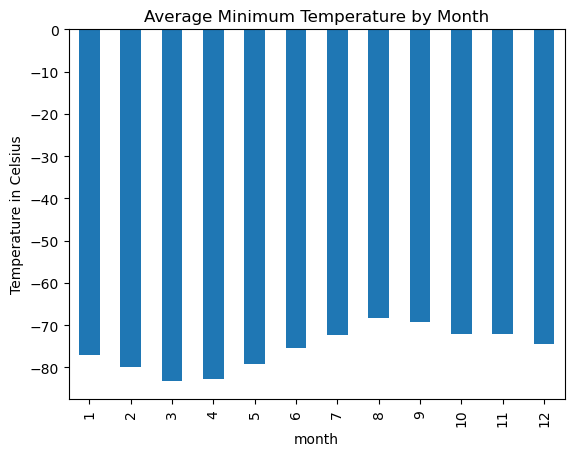

In [15]:
# Plot the average minimum temperature by month
df.groupby(COL_MMONTH)[COL_TEMP].mean().plot.bar(
    xlabel='month', ylabel='Temperature in Celsius', title='Average Minimum Temperature by Month')

<Axes: title={'center': 'Average Minimum Temperature by Month'}, xlabel='month', ylabel='Temperature in Celsius'>

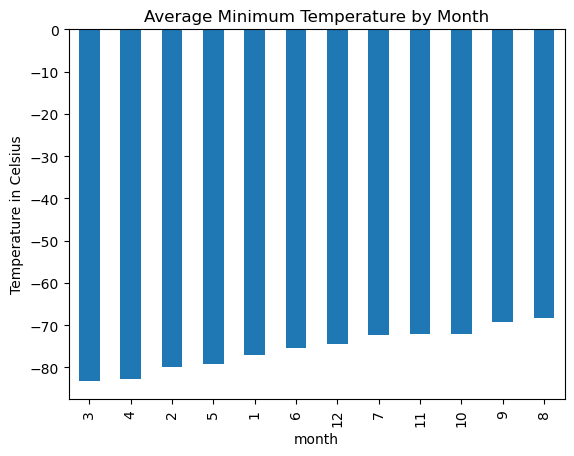

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
df.groupby(COL_MMONTH)[COL_TEMP].mean().sort_values().plot.bar(
    xlabel='month', ylabel='Temperature in Celsius', title='Average Minimum Temperature by Month')

In [17]:
# 4. What is the average pressure by month?
df.groupby(COL_MMONTH)[COL_PRESSURE].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: title={'center': 'Average Pressure by Month'}, xlabel='month', ylabel='Atmospheric Pressure'>

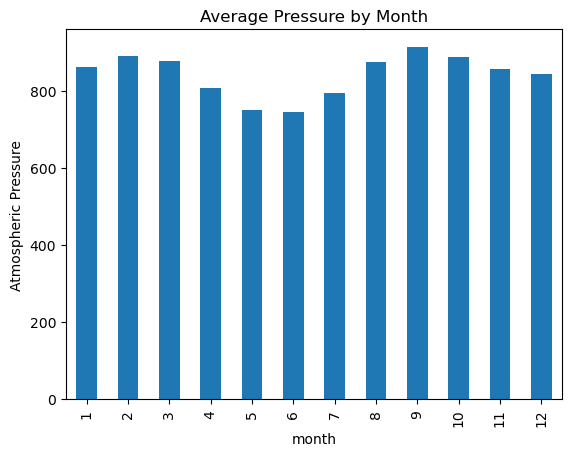

In [18]:
# Plot the average pressure by month
df.groupby(COL_MMONTH)[COL_PRESSURE].mean().plot.bar(
    xlabel='month', ylabel='Atmospheric Pressure', title='Average Pressure by Month')

<Axes: title={'center': 'Average Pressure by Month'}, xlabel='month', ylabel='Atmospheric Pressure'>

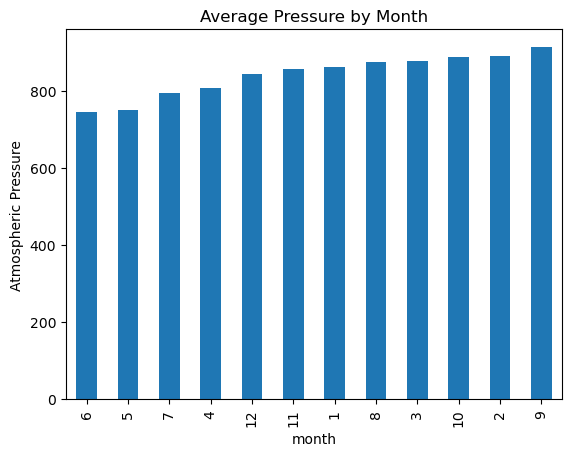

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
df.groupby(COL_MMONTH)[COL_PRESSURE].mean().sort_values().plot.bar(
    xlabel='month', ylabel='Atmospheric Pressure', title='Average Pressure by Month')

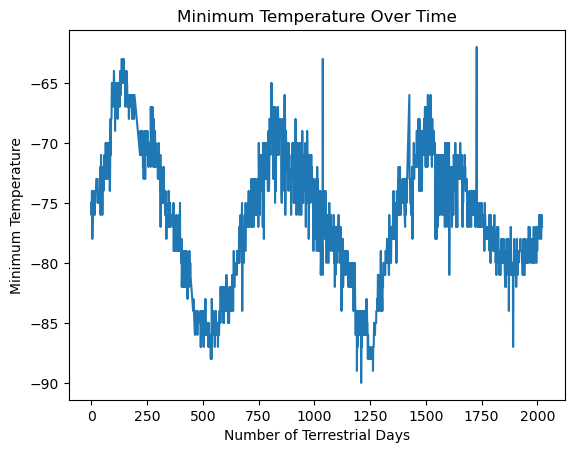

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# This reproduces the graph from the starter notebook, but I don't believe that graph is appropriate.
# That graph effectively assumes that each measurement goes with sequential terrestrial days. In fact, 
# there are 1867 measurements covering 2021 terrestrial days, Aug 16 2012 - Feb 27 2018.
# So there are gaps. For instance, there is a measurement for 2012-09-06 and 2012-09-08, but not 2012-09-07.
# df[COL_TEMP].plot()

# Set up a new column with the actual number of terrestrial days elapsed from beginning of measurements.
tdate_offsets = [0]
start_date = df[COL_TDATE][0]
for i in range(1, len(df[COL_TDATE])):
    date = df[COL_TDATE][i]
    offset = date - start_date
    tdate_offsets.append(offset.days)

plt.plot(tdate_offsets, df[COL_TEMP])
plt.title("Minimum Temperature Over Time")
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show()

#### Minimum Temperature

**What are the coldest and the warmest months on Mars (at the location of Curiosity)?**
Coldest: Month 3. Warmest: Month 8. But this is based only on minimum temperatures.


#### Atmospheric Pressure

**Which months have the lowest and the highest atmospheric pressure on Mars?**
Lowest: Month 6. Highest: Month 9.

#### Year Length

**How many months exist on Mars?**
12, according to this data. Though Googling suggests this is not widely accepted.

**How many Martian (and not Earth) days worth of data exist in the scraped dataset?**
1867

**About how many terrestrial (Earth) days exist in a Martian year?**
Visually, it looks like we have about 3 Martian years worth of data over 2021 Earth days. From that estimate, there are (2021 / 3) = 673.7 Earth days per Martianyear.

Since the data includes Martian month numbers, we can get a more accurate calculation by looking at the last day of some Martian months:

- Mars Month 6, Last Day: Sol 53,   Earth Day 2012-09-29
- Mars Month 6, Last Day: Sol 722,  Earth Day 2014-08-17: 687 Days
- Mars Month 6, Last Day: Sol 1388, Earth Day 2016-07-02: 685 Days

- Mars Month 12, Last Day: Sol 359,  Earth Day 2015-06-18
- Mars Month 12, Last Day: Sol 1687, Earth Day 2017-05-05: 687 Days

This indicates 686.3 Earth days per Martian year, which is closer to the correct answer of 687 as provided by NASA.n.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv('mars_weather.csv')

In [22]:
# This really should be much higher, since we don't need the browser any more
# after getting the HTML text.
browser.quit()